                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



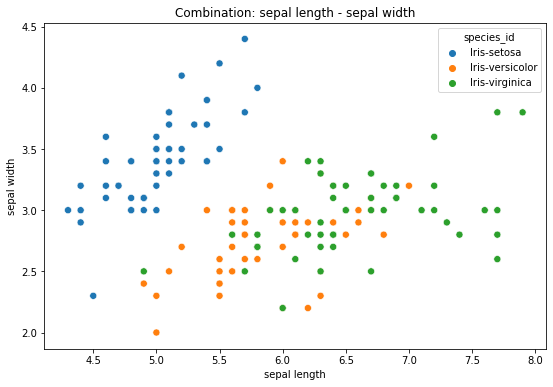

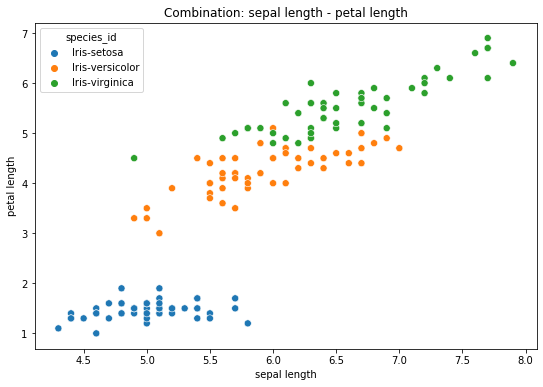

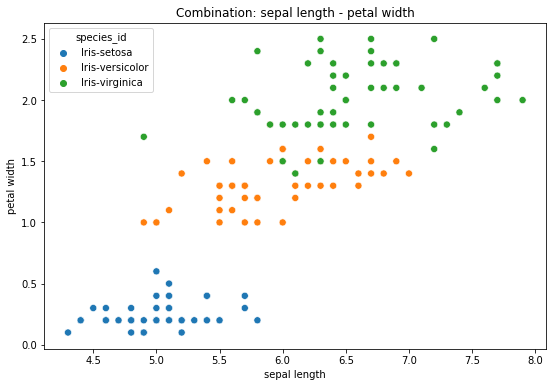

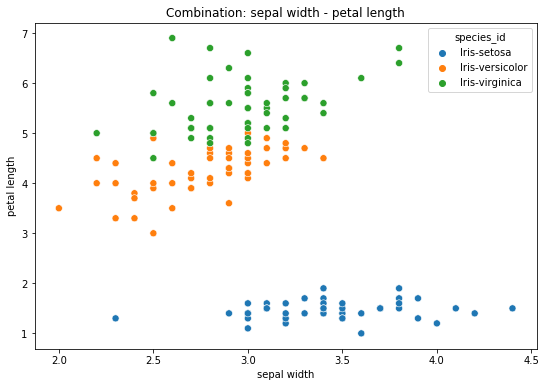

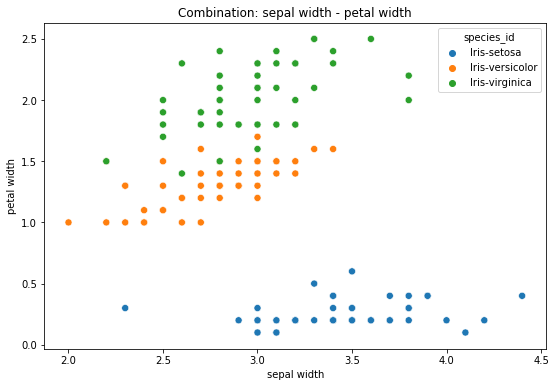

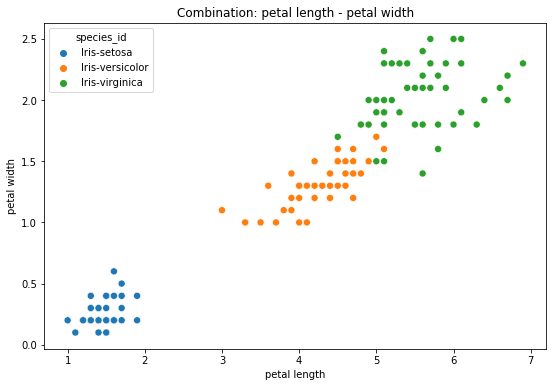

[[-0.41672304  0.89706546 -2.3334702  -1.0143112 ]
 [ 0.37332849 -0.25673987 -0.17331767 -0.79971614]
 [ 0.04339455 -0.64032558  2.50678787  1.81402734]]
[  9.24586191   2.48887904 -11.73474095]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_table('iris.data', delimiter=',') # učitavanje podataka

# podjela skupa podataka na skup značajka i skup oznaka
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

# podjela skupa podataka na skup za treniranje i testiranje
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3)


# stvaranje modela logističke regresije 
Logistic_regression = LogisticRegression()
Logistic_regression.fit(x_train,y_train) # treniranje modela

predictions = Logistic_regression.predict(x_test) # generiranje previđanja

print(classification_report(y_test, predictions)) # ispis analize dobrote predviđanja 

# iscrtavanje vizualne reprazentacije različitih kombinacija značajki 
for i in range(len(df.columns) - 1):
    for j in range(len(df.columns) - 1):
        if j>i:
            plt.figure(figsize=(9, 6))
            sns.scatterplot(x=df.columns[i], y=df.columns[j], data=df, hue='species_id', s=50)
            plt.title("Combination: {} - {}".format(df.columns[i], df.columns[j]))
            plt.show()
            
# Ispis vrijednosti pravaca koje djele skupove
print(Logistic_regression.coef_)
print(Logistic_regression.intercept_)
